In [1]:
from pprint import pprint
import os, json, sys

# import reframe test script:
sys.path.append('../reframe') # so that next line can find reframe itself ...
import reframe_imb

In [2]:
# find output files for this test:

def find_run_outputs(root='.', test=None, ext='.out'):
    """ Find test files within an output tree.
    
        Args:
            root: path to start searching from
            test: str, limit results to directories which contain this string (default: all)
            ext: str, limit results to files with this extension
        
        Returns a sequence of str paths.
    """
    
    # directory is soemthing like:
    # ../output/sausage-newslurm/compute/gnu8-openmpi3/IMB_MPI1Test/
    
    # TODO: use reframe/reframe/frontend/cli.py code to get the current system, something like
    # import reframe
    # import reframe.core.config as config
    # import reframe.core.runtime as runtime
    # import os

    # # assume default location!
    # print(reframe.INSTALL_PREFIX)
    # config_file = os.path.join(reframe.INSTALL_PREFIX, 'reframe/settings.py')
    # settings = config.load_settings_from_file(config_file)
    # runtime.init_runtime(settings.site_configuration, options.system,
    #                              non_default_craype=options.non_default_craype)
    
    results = []
    for (dirpath, dirnames, filenames) in os.walk(root):
        # in-place filter dirnames to avoid hidden directories:
        for idx, d in enumerate(dirnames):
            if d.startswith('.'):
                del dirnames[idx]
        for f in filenames:
            if os.path.splitext(f)[-1] == ext:
                path = os.path.join(dirpath, f)
                testdir = os.path.basename(os.path.dirname(path))
                if test is None or test in testdir:
                    results.append(path)
    return(results)
                
run_outputs = find_run_outputs('../output', 'IMB')
print(run_outputs)

['../output/alaska/compute-ib/gnu-openmpi/IMB_PingPong/rfm_IMB_PingPong_job.out', '../output/alaska/compute-ib/gnu-openmpi/IMB_Uniband/rfm_IMB_Uniband_job.out', '../output/alaska/compute-roce/gnu-openmpi/IMB_PingPong/rfm_IMB_PingPong_job.out', '../output/alaska/compute-roce/gnu-openmpi/IMB_Uniband/rfm_IMB_Uniband_job.out']


In [3]:
# load results using the same function that we use for reframe performance tests:

results = []
for path in run_outputs:
    result = reframe_imb.read_imb_out(path)
    results.append(result)
    print('read', path, result.keys())

read ../output/alaska/compute-ib/gnu-openmpi/IMB_PingPong/rfm_IMB_PingPong_job.out dict_keys(['pingpong'])
read ../output/alaska/compute-ib/gnu-openmpi/IMB_Uniband/rfm_IMB_Uniband_job.out dict_keys(['uniband'])
read ../output/alaska/compute-roce/gnu-openmpi/IMB_PingPong/rfm_IMB_PingPong_job.out dict_keys(['pingpong'])
read ../output/alaska/compute-roce/gnu-openmpi/IMB_Uniband/rfm_IMB_Uniband_job.out dict_keys(['uniband'])


In [4]:
# add metadata to results:

def parse_path_metadata(path):
    """ Return a dict of reframe info from a results path """
    parts = path.split(os.path.sep)
    #sysname, partition, environ, testname, filename = parts[-5:]
    COMPONENTS = ('sysname', 'partition', 'environ', 'testname', 'filename')
    info = dict(zip(COMPONENTS, parts[-5:]))
    return info    
    
for resultfile in results:
    for benchmark, result in resultfile.items():
        path_meta = parse_path_metadata(result['meta']['path'])
        result['meta'].update(path_meta)
        print(benchmark, ':')
        pprint(result['meta'])

pingpong :
{'benchmark': 'pingpong',
 'environ': 'gnu-openmpi',
 'filename': 'rfm_IMB_PingPong_job.out',
 'partition': 'compute-ib',
 'path': '../output/alaska/compute-ib/gnu-openmpi/IMB_PingPong/rfm_IMB_PingPong_job.out',
 'processes': 2,
 'sysname': 'alaska',
 'testname': 'IMB_PingPong'}
uniband :
{'benchmark': 'uniband',
 'environ': 'gnu-openmpi',
 'filename': 'rfm_IMB_Uniband_job.out',
 'partition': 'compute-ib',
 'path': '../output/alaska/compute-ib/gnu-openmpi/IMB_Uniband/rfm_IMB_Uniband_job.out',
 'processes': 2,
 'sysname': 'alaska',
 'testname': 'IMB_Uniband'}
pingpong :
{'benchmark': 'pingpong',
 'environ': 'gnu-openmpi',
 'filename': 'rfm_IMB_PingPong_job.out',
 'partition': 'compute-roce',
 'path': '../output/alaska/compute-roce/gnu-openmpi/IMB_PingPong/rfm_IMB_PingPong_job.out',
 'processes': 2,
 'sysname': 'alaska',
 'testname': 'IMB_PingPong'}
uniband :
{'benchmark': 'uniband',
 'environ': 'gnu-openmpi',
 'filename': 'rfm_IMB_Uniband_job.out',
 'partition': 'compute-roce

In [5]:
# Group results by *testname*

test_results = {} # key: test name

for resultfile in results:
    for benchmark, result in resultfile.items():
        testname = result['meta']['testname']
    cases = test_results.setdefault(testname, [])
    cases.append(result)

for test, cases in test_results.items():
    print(test, ':')
    for c in cases:
        pprint(c['meta'])


IMB_PingPong :
{'benchmark': 'pingpong',
 'environ': 'gnu-openmpi',
 'filename': 'rfm_IMB_PingPong_job.out',
 'partition': 'compute-ib',
 'path': '../output/alaska/compute-ib/gnu-openmpi/IMB_PingPong/rfm_IMB_PingPong_job.out',
 'processes': 2,
 'sysname': 'alaska',
 'testname': 'IMB_PingPong'}
{'benchmark': 'pingpong',
 'environ': 'gnu-openmpi',
 'filename': 'rfm_IMB_PingPong_job.out',
 'partition': 'compute-roce',
 'path': '../output/alaska/compute-roce/gnu-openmpi/IMB_PingPong/rfm_IMB_PingPong_job.out',
 'processes': 2,
 'sysname': 'alaska',
 'testname': 'IMB_PingPong'}
IMB_Uniband :
{'benchmark': 'uniband',
 'environ': 'gnu-openmpi',
 'filename': 'rfm_IMB_Uniband_job.out',
 'partition': 'compute-ib',
 'path': '../output/alaska/compute-ib/gnu-openmpi/IMB_Uniband/rfm_IMB_Uniband_job.out',
 'processes': 2,
 'sysname': 'alaska',
 'testname': 'IMB_Uniband'}
{'benchmark': 'uniband',
 'environ': 'gnu-openmpi',
 'filename': 'rfm_IMB_Uniband_job.out',
 'partition': 'compute-roce',
 'path': '

In [6]:
def diff_meta(results, ignore=['path']):
    """ Given a sequence of results dicts, returns
            
            common, [difference1, difference2, ...]
        
        where each of these are dicts based on the ['meta'] properties of each result dict
        ignoring given keys
        
        TODO: describe this properly
    """
    
    meta = [r['meta'].copy() for r in results]
    
    for key in ignore:
        for m in meta:
            m.pop(key, None)
    keyvals = [set(zip(m.keys(), m.values())) for m in meta]
    common = keyvals[0].intersection(*keyvals[1:])
    differences = [dict(b.difference(common)) for b in keyvals]
    return dict(common), differences
                   
# tests:                   
# c, a, b = diff_meta(test_results['IMB_PingPong'])
# print('common:')
# pprint(c)
# print('a:')
# pprint(a)
# print('b:')
# pprint(b)

IMB_PingPong :
dict_keys(['#bytes', '#repetitions', 't[usec]', 'Mbytes/sec'])
dict_keys(['#bytes', '#repetitions', 't[usec]', 'Mbytes/sec'])
IMB_Uniband :
dict_keys(['#bytes', '#repetitions', 'Mbytes/sec', 'Msg/sec'])
dict_keys(['#bytes', '#repetitions', 'Mbytes/sec', 'Msg/sec'])


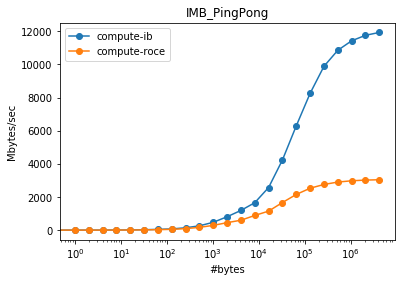

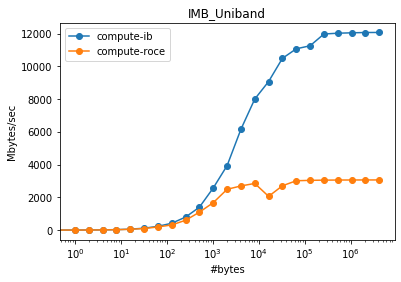

In [10]:
# Plotting:
# TODO: generate one plot per TEST, with a-vs-b comparisons for all cases of that test

%matplotlib inline
import matplotlib.pyplot as plt

# TODO: add latency for pingpong

for test, cases in test_results.items():
    print(test, ':')
    common, differences = diff_meta(cases)
    plt.figure()
    for ix, case in enumerate(cases):
        data = case['data']
        unique_meta = differences[ix]
        label = '-'.join(list(unique_meta.values()))
        print(data.keys())
        plt.plot(data['#bytes'], data['Mbytes/sec'], 'o-', label=label)
        
        plt.grid()
        plt.title(test)
        plt.legend()
        plt.xscale('log')
        plt.xlabel('#bytes')
        plt.ylabel('Mbytes/sec')